!pip install imbalanced-learn

### Imbalanced Data
A dataset where number of records for one class is significantly lower (*minority class*) than the other class (*majority class*).<br><br>
For example, a binary classification problem with 1000 rows, number of records for one class is 800 and that for the other is 200. This represents an imbalanced dataset with ratio of majority to minority class as 80:20 
- If the ratio of majority class to minority class is 50:50 or 60:40. It is a **balanced dataset**.<br>
- If the ratio of majority class to minority class is 70:30 or 80:20 or 90:10. It is an **imbalanced dataset**.<br>

### Where do we find these imbalanced dataset.
- *in medical usecase:* for example whether a person is having cancer or not. Clearly, not each and every person but less number of person wil be having a cancer 
- *fraudulent transactions in banks*
- *natural disaster*

### Problem faced with imbalanced dataset
Machine learning algorithm gets biased to the majority class.

### Banking dataset
Here we are considering an imbalanced Banking Dataset where aim is to predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns with the target variable y.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [2]:
data= pd.read_csv("new_train.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


### Check for class imbalance

no     29238
yes     3712
Name: y, dtype: int64


Text(0.5, 1.0, 'target variable')

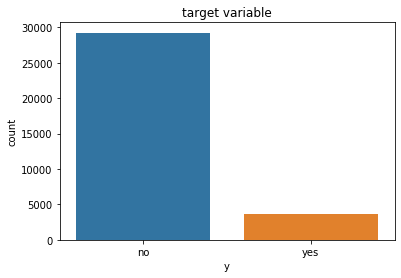

In [3]:
# number of records in target class 
print(data["y"].value_counts())

sns.countplot(data["y"])
plt.title("target variable")

In [4]:
# percentage of class present in target variable(y) 
print("percentage of NO and YES\n",data["y"].value_counts()/len(data)*100)

percentage of NO and YES
 no     88.734446
yes    11.265554
Name: y, dtype: float64


The class distribution in the target variable is ~89:11 indicating an imbalanced dataset

### Featuring Engineering before resampling

In [5]:
# identifying categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [6]:
# initialising label encoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    data[feature]= le.fit_transform(data[feature])

In [7]:
# separating independent and dependent variable
x= data.iloc[:, :-1]
y= data.iloc[:, -1]

### 1. Undersampling
In undersampling, all the records of minority class is taken as it is while the records of majority class is randomly eliminated until both the class becomes equal.<br>

In [8]:
from imblearn.under_sampling import NearMiss

#initialising undersampling
under_sample= NearMiss()

#implementing undersampling
x_res, y_res= under_sample.fit_sample(x,y)

In [9]:
# comparing target class count after resampling
print("target variable class in original dataset\n", data["y"].value_counts())
print("target variable class in undersampled dataset\n", y_res.value_counts())

target variable class in original dataset
 0    29238
1     3712
Name: y, dtype: int64
target variable class in undersampled dataset
 1    3712
0    3712
Name: y, dtype: int64


In [10]:
# comparing dataset shape
print("original dataset shape", data.shape)
print("undersampled dataset shape", x_res.shape, y_res.shape)

original dataset shape (32950, 16)
undersampled dataset shape (7424, 15) (7424,)


**Disadvantage :**In under smapling there is an information loss since we are decreasing the majority class records. Undersampling should not be performed in case of small dataset

### 2. Oversampling
In oversampling, all the records of majority class is taken as it is while the number of minority class is increased by replicating them until both the class becomes equal.

In [16]:
from imblearn.over_sampling import RandomOverSampler

#initialising oversampling
over_sample= RandomOverSampler()

#implementing oversampling
x_ores, y_ores= over_sample.fit_sample(x,y)

In [17]:
# comparing target class count after resampling
print("target variable class in original dataset\n", data["y"].value_counts())
print("target variable class in undersampled dataset\n", y_ores.value_counts())

target variable class in original dataset
 0    29238
1     3712
Name: y, dtype: int64
target variable class in undersampled dataset
 1    29238
0    29238
Name: y, dtype: int64


In [18]:
# comparing dataset shape
print("original dataset shape", data.shape)
print("undersampled dataset shape", x_ores.shape, y_ores.shape)

original dataset shape (32950, 16)
undersampled dataset shape (58476, 15) (58476,)


**Disadvantege :** Oversampling may lead to overfitting due to replicating same records

### 3. SMOTE - Synthetic Minority Oversampling Technique

In [11]:
from imblearn.combine import SMOTETomek

#initialising oversampling
smote= SMOTETomek()

#implementing oversampling
x_sm, y_sm= smote.fit_sample(x,y)

In [12]:
# comparing target class count
print("target variable class in original dataset\n", data["y"].value_counts())
print("target variable class in oversampled dataset\n", y_sm.value_counts())

target variable class in original dataset
 0    29238
1     3712
Name: y, dtype: int64
target variable class in oversampled dataset
 1    29077
0    29077
Name: y, dtype: int64


In [13]:
# comparing dataset shape
print("original dataset shape", data.shape)
print("oversampled dataset shape", x_sm.shape, y_sm.shape)

original dataset shape (32950, 16)
oversampled dataset shape (58154, 15) (58154,)
